# Practical 3: Bank Customer Churn Prediction using Neural Network

## Objective
Build a deep learning neural network to predict whether a bank customer will churn (leave the bank) based on various customer features.

## Dataset Information
- **Dataset Name:** Bank Customer Churn Modeling Dataset
- **Kaggle Link:** https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
- **Local Path:** `Dataset/3-Churn_Modelling.csv`
- **Loading Strategy:** Try Kaggle first, fallback to local file if unavailable
- **Features:** Credit Score, Geography, Gender, Age, Tenure, Balance, Products, Credit Card, Active Member, Estimated Salary
- **Target:** Exited (1=Customer Churned, 0=Customer Stayed)

## Algorithm Implemented
**Artificial Neural Network (ANN)** using TensorFlow/Keras
- Input Layer: 11 features (after encoding)
- Hidden Layer 1: 6 neurons, ReLU activation, 30% Dropout
- Hidden Layer 2: 6 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation (binary classification)

## Workflow Steps
1. Import libraries (pandas, numpy, sklearn, tensorflow/keras)
2. Load dataset from Kaggle or local directory
3. Feature Selection:
   - X = columns 3-13 (customer features)
   - Y = column 13 (Exited - target variable)
4. Data Preprocessing:
   - Encode categorical variables:
     * Gender: Label Encoding (Male=1, Female=0)
     * Geography: One-Hot Encoding (drop first to avoid dummy variable trap)
5. Split data into training (80%) and testing (20%) sets
6. Feature Scaling using StandardScaler (normalization)
7. Build Neural Network Architecture:
   - Sequential model with Dense layers
   - Dropout regularization to prevent overfitting
8. Compile model:
   - Optimizer: Adam
   - Loss: Binary Crossentropy
   - Metrics: Accuracy
9. Train model for 20 epochs with batch size of 32
10. Evaluate model performance:
    - Training vs Validation accuracy per epoch
    - Confusion Matrix
    - Final accuracy score
11. Visualize accuracy improvement over epochs

## Key Libraries
- **pandas & numpy** - Data manipulation
- **sklearn.preprocessing** - LabelEncoder, StandardScaler
- **sklearn.model_selection** - train_test_split
- **tensorflow.keras** - Neural network implementation
- **matplotlib** - Visualization

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
try:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    print("✓ TensorFlow imported successfully")
except ImportError:
    print("⚠️ TensorFlow is not installed.")
    print("\nTensorFlow is not available for Python 3.14 yet.")
    print("Please use Python 3.11 or 3.12 for this notebook.")
    print("\nTo install TensorFlow, run:")
    print("  pip install tensorflow")
    raise ImportError("TensorFlow is required for this notebook but not available for Python 3.14")

c:\Users\sahil\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\sahil\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\sahil\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

✓ TensorFlow imported successfully


In [3]:
try:
    import opendatasets as od
    od.download("https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling")
    df = pd.read_csv("bank-customer-churn-modeling/Churn_Modelling.csv")
    print("✓ Dataset loaded from Kaggle")
except:
    df = pd.read_csv("Dataset/3-Churn_Modelling.csv")
    print("✓ Dataset loaded from local directory")

✓ Dataset loaded from local directory


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [6]:
labelencoder_gender = LabelEncoder()
X['Gender'] = labelencoder_gender.fit_transform(X['Gender'])

X = pd.get_dummies(X, columns=['Geography'], drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

print("Sample of normalized training data:")
display(X_train_df.head())

print("\nMean of features after scaling:\n", X_train_df.mean())
print("\nStandard deviation of features after scaling:\n", X_train_df.std())

Sample of normalized training data:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,0.356500,0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,-0.579467,-0.576388
1,-0.203898,0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,1.725723,-0.576388
2,-0.961472,0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.579467,1.734942
3,-0.940717,-1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,-0.579467,-0.576388
4,-1.397337,0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,-0.579467,-0.576388



Mean of features after scaling:
 CreditScore          5.435652e-16
Gender               2.842171e-17
Age                 -1.896261e-16
Tenure               6.661338e-17
Balance             -3.099743e-16
NumOfProducts        1.065814e-16
HasCrCard           -3.197442e-17
IsActiveMember      -1.776357e-17
EstimatedSalary      1.776357e-17
Geography_Germany   -4.263256e-17
Geography_Spain     -7.194245e-17
dtype: float64

Standard deviation of features after scaling:
 CreditScore          1.000063
Gender               1.000063
Age                  1.000063
Tenure               1.000063
Balance              1.000063
NumOfProducts        1.000063
HasCrCard            1.000063
IsActiveMember       1.000063
EstimatedSalary      1.000063
Geography_Germany    1.000063
Geography_Spain      1.000063
dtype: float64


In [10]:
# 4. Initialize and build the Neural Network model
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

c:\Users\sahil\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7610 - loss: 0.5628 - val_accuracy: 0.8035 - val_loss: 0.4648
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7610 - loss: 0.5628 - val_accuracy: 0.8035 - val_loss: 0.4648
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4784 - val_accuracy: 0.8035 - val_loss: 0.4364
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4784 - val_accuracy: 0.8035 - val_loss: 0.4364
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4595 - val_accuracy: 0.8035 - val_loss: 0.4266
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4595 - val_accuracy: 0.8035 - val_loss: 0.4266
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4537 - val_accuracy: 0.8035 - val_loss: 0.4235
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4537 - val_accuracy: 0.

In [13]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("Accuracy per Epoch:\n")
for i in range(len(train_acc)):
    print(f"Epoch {i+1}: Training Accuracy = {train_acc[i]*100:.2f}%, Validation Accuracy = {val_acc[i]*100:.2f}%")

Accuracy per Epoch:

Epoch 1: Training Accuracy = 76.10%, Validation Accuracy = 80.35%
Epoch 2: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 3: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 4: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 5: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 6: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 7: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 8: Training Accuracy = 79.56%, Validation Accuracy = 80.45%
Epoch 9: Training Accuracy = 79.61%, Validation Accuracy = 80.60%
Epoch 10: Training Accuracy = 80.09%, Validation Accuracy = 80.65%
Epoch 11: Training Accuracy = 80.08%, Validation Accuracy = 81.10%
Epoch 12: Training Accuracy = 80.58%, Validation Accuracy = 81.40%
Epoch 13: Training Accuracy = 80.80%, Validation Accuracy = 81.30%
Epoch 14: Training Accuracy = 80.76%, Validation Accuracy = 81.50%
Epoch 15: Training Accuracy = 80.62%, Validation A

In [14]:
import matplotlib.pyplot as plt

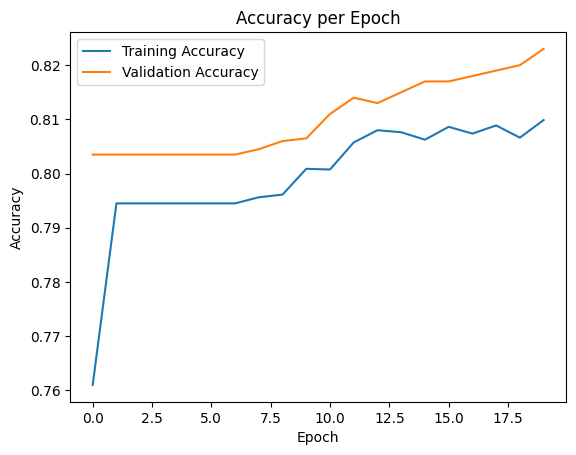

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
print("Final Accuracy: {:.2f}%".format(acc * 100))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Final Accuracy: 82.30%
Final Accuracy: 82.30%


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1561   46]
 [ 308   85]]
